## Part 1 - Data Exploration: Economic data

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Australia Cash Rate Target

In [4]:
#import rba cash rate data into pd.Dataframe and set date as index
df_rba = pd.read_csv('./Resources/rba_cash_rate.csv', index_col = "date", dayfirst = True, parse_dates = True, infer_datetime_format = True)
df_rba.head()

,cash_rate
date,
2012-01-01,4.25
2012-02-01,4.25
2012-03-01,4.25
2012-04-01,4.25
2012-05-01,3.77


In [5]:
#check for any missing values
df_rba.isnull().sum()

cash_rate    0
dtype: int64

In [6]:
#calculate the monthly change in cash rate target
df_rba["rate_change"] = df_rba["cash_rate"].pct_change()

<AxesSubplot:title={'center':'2012-2022: Australia Cash Rate Target'}, xlabel='date'>

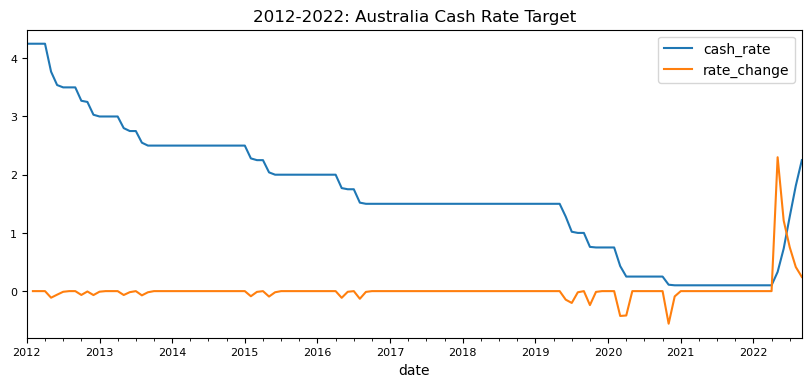

In [7]:
#plot cash rate target
plot_rba = df_rba.plot(title = "2012-2022: Australia Cash Rate Target", figsize = (10,4), fontsize = 8)
display(plot_rba)

## Australia Unemployment Statistics

In [8]:
#import unemployment data into pd.Dataframe and set date as index
df_unemploy = pd.read_csv('./Resources/abs_unemployment.csv', index_col="date", dayfirst = True, parse_dates = True, infer_datetime_format = True)
df_unemploy.head()

,aus,nsw,vic,qld,sa,wa,tas,nt,act
date,,,,,,,,,
2012-01-01,5.05,5.11,5.02,5.49,5.13,4.13,6.76,4.52,3.46
2012-02-01,5.20,5.10,5.52,5.72,5.39,3.74,7.10,4.78,3.39
2012-03-01,5.18,4.72,5.83,5.51,5.21,3.93,6.94,3.66,4.03
2012-04-01,4.99,5.01,5.30,5.22,5.36,3.73,7.67,4.06,3.00
2012-05-01,5.20,5.04,5.55,5.81,5.15,3.85,6.39,4.79,3.99


In [9]:
#check for any missing values
df_unemploy.isnull().sum()

aus    0
nsw    0
vic    0
qld    0
sa     0
wa     0
tas    0
nt     0
act    0
dtype: int64

In [10]:
df_unemploy.describe()

,aus,nsw,vic,qld,sa,wa,tas,nt,act
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,5.506589,5.126977,5.572016,5.991783,6.211783,5.353023,6.307442,4.407287,3.953643
std,0.727513,0.749934,0.866867,0.813069,0.934922,1.080136,0.997268,0.865711,0.668065
min,3.420000,3.300000,3.140000,3.270000,3.890000,2.920000,3.640000,2.800000,2.660000
25%,5.200000,4.640000,4.930000,5.770000,5.640000,4.600000,5.800000,3.750000,3.540000
50%,5.570000,5.100000,5.680000,6.090000,6.250000,5.610000,6.390000,4.260000,3.910000
75%,5.870000,5.670000,6.130000,6.300000,6.870000,6.080000,6.940000,4.970000,4.310000
max,7.550000,7.230000,7.520000,8.840000,8.680000,8.370000,8.790000,7.550000,6.540000


In [11]:
# plot unemployment by states and terrorities
df_unemploy.hvplot()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [12]:
#create a dataframe with unemployment statistics by state
df_state = df_unemploy.iloc[:,1:9].groupby(df_unemploy.index.year).mean()
df_state

,nsw,vic,qld,sa,wa,tas,nt,act
date,,,,,,,,
2012,5.051667,5.495000,5.764167,5.488333,3.980833,6.952500,4.184167,3.813333
2013,5.593333,5.887500,5.832500,6.323333,4.583333,7.695000,5.061667,4.183333
2014,5.720833,6.594167,6.400833,6.685833,5.120000,7.183333,3.891667,4.304167
2015,5.754167,6.110833,6.261667,7.415833,5.887500,6.553333,4.204167,4.755000
2016,5.120000,5.835000,6.109167,6.830833,6.076667,6.486667,3.767500,3.901667
2017,4.827500,5.956667,6.088333,6.340000,5.904167,5.875000,3.899167,4.046667
2018,4.705000,4.975833,6.167500,5.681667,6.205000,5.892500,4.270833,3.664167
2019,4.460833,4.733333,6.144167,6.255833,5.897500,6.317500,5.012500,3.431667
2020,6.120833,6.459167,7.193333,6.965000,6.680833,6.474167,5.672500,3.827500


In [13]:
#find max unemployment rate and the corresponding state for each year
df_state.max(axis = 1), df_state.idxmax(axis = 1)

(date
 2012    6.952500
 2013    7.695000
 2014    7.183333
 2015    7.415833
 2016    6.830833
 2017    6.340000
 2018    6.205000
 2019    6.317500
 2020    7.193333
 2021    5.470000
 2022    4.465556
 dtype: float64,
 date
 2012    tas
 2013    tas
 2014    tas
 2015     sa
 2016     sa
 2017     sa
 2018     wa
 2019    tas
 2020    qld
 2021    qld
 2022     sa
 dtype: object)

In [14]:
#find min unemployment rate and the corresponding state for each year
df_state.min(axis = 1), df_state.idxmin(axis = 1)

(date
 2012    3.813333
 2013    4.183333
 2014    3.891667
 2015    4.204167
 2016    3.767500
 2017    3.899167
 2018    3.664167
 2019    3.431667
 2020    3.827500
 2021    4.211667
 2022    3.150000
 dtype: float64,
 date
 2012    act
 2013    act
 2014     nt
 2015     nt
 2016     nt
 2017     nt
 2018    act
 2019    act
 2020    act
 2021    act
 2022    act
 dtype: object)

## Australia Household Saving Ratio

In [15]:
#import housing saving into pd.Dataframe and set date as index
df_saving =  pd.read_csv('./Resources/abs_saving_ratio.csv', index_col="date", dayfirst = True, parse_dates = True, infer_datetime_format = True)
df_saving.head()

,saving_ratio
date,
2014-06-01,8.0
2014-09-01,7.6
2014-12-01,7.8
2015-03-01,7.2
2015-06-01,7.6


In [16]:
#check for any missing values
df_saving.isnull().sum()

saving_ratio    0
dtype: int64

In [17]:
#review data types
df_saving.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2014-06-01 to 2022-06-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   saving_ratio  33 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [18]:
#calculate the quarterly change in saving ratio
df_saving["saving_change"] = df_saving["saving_ratio"].pct_change()

<AxesSubplot:title={'center':'2014-2022: Australia Household Saving'}, xlabel='date'>

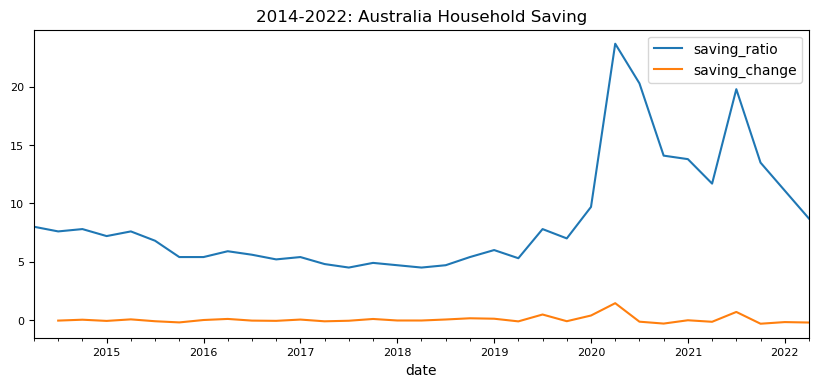

In [19]:
#plot saving and change in saving trends
plot_saving = df_saving.plot(title = "2014-2022: Australia Household Saving", figsize = (10,4), fontsize = 8)
display(plot_saving)

In [27]:
#combine uemployment and saving dataframe together
df_econ = pd.concat([df_unemploy, df_saving, df_rba], axis = "columns", join = "inner")
df_econ.head()

,aus,nsw,vic,qld,sa,wa,tas,nt,act,saving_ratio,saving_change,cash_rate,rate_change
date,,,,,,,,,,,,,
2014-06-01,6.05,5.73,6.61,6.23,7.14,5.10,7.28,5.07,3.65,8.0,NaN,2.50,0.000000
2014-09-01,6.23,5.95,6.85,6.38,6.78,5.01,7.56,3.58,5.01,7.6,-0.050000,2.50,0.000000
2014-12-01,6.11,5.90,6.44,6.30,6.65,5.69,6.60,3.63,4.28,7.8,0.026316,2.50,0.000000
2015-03-01,6.10,5.86,6.23,6.54,6.33,5.53,6.48,4.14,4.39,7.2,-0.076923,2.25,-0.013158
2015-06-01,6.01,5.75,6.03,5.90,8.29,6.02,6.42,4.74,4.08,7.6,0.055556,2.00,-0.019608


In [26]:
#calculate change in unmployment
df_econ["unemployment_change"] = df_econ["aus"].pct_change()

In [22]:
#remove unwanted columns and rename columns
df1 = df_econ.filter(["date","unemployment_change","saving_change", "rate_change"])

In [23]:
#rename columns
df1 = df1.rename(columns = {"unemployment_change":"unemployment",
                            "saving_change":"saving",
                             "rate_change":"cash_rate"})
df1.head()

,unemployment,saving,cash_rate
date,,,
2014-06-01,NaN,NaN,0.000000
2014-09-01,0.029752,-0.050000,0.000000
2014-12-01,-0.019262,0.026316,0.000000
2015-03-01,-0.001637,-0.076923,-0.013158
2015-06-01,-0.014754,0.055556,-0.019608


In [24]:
#calculate correlation between 
df1.corr()

,unemployment,saving,cash_rate
unemployment,1.000000,0.762866,-0.182927
saving,0.762866,1.000000,-0.168706
cash_rate,-0.182927,-0.168706,1.000000


<AxesSubplot:>

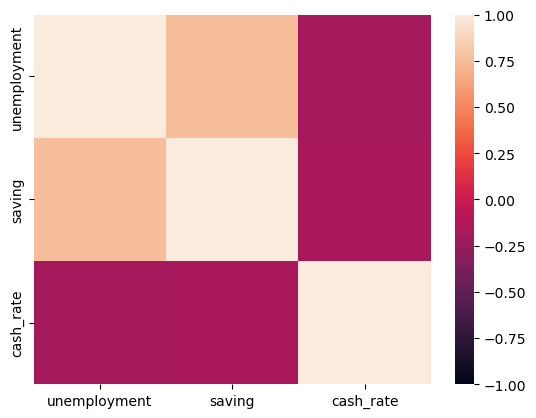

In [25]:
#plot correlation matrix
sns.heatmap(df1.corr(), vmin = -1, vmax = 1)